### Classifiying Recipe Difficulty with LDA-components...
- http://bbengfort.github.io/tutorials/2016/05/19/text-classification-nltk-sckit-learn.html
- http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html**
- http://stackoverflow.com/questions/26825729/extract-number-from-string-python

REF `recipes_runNLTK_LDA_ClassifyPrepDiff_FindCompTokens_v0.ipynb`

In [ ]:
!pwd

In [1]:
import pandas as pd
import numpy as np

In [2]:
# filepath = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/recipes/'#bbc_goodfood_recipes_pickles/'
filepath = '/Users/hrm/Dropbox/DSrelated/Metis/recipes/'#bbc_goodfood_recipes_pickles/'

In [3]:
Ing = pd.read_pickle(filepath + 'RecipesIng4modelling_Dataframe_mar2017.pkl')

In [4]:
Ing

,title,method,ingred,Ningred,prepTime,cookTime,prepDifficulty
0,Lemon drizzle cake,Heat oven to 180C/fan 160C/gas 4. Beat togethe...,unsalted butter sugar egg lemon self-raising f...,7,15.0,45.0,Easy
1,Chilli con carne,Prepare your vegetables. Chop 1 large onion in...,oil onion red pepper garlic hot chilli powder ...,16,70.0,25.0,Easy
2,Ultimate chocolate cake,Butter a 20cm round cake tin (7.5cm deep) and ...,dark-chocolate butter instant coffee granules ...,15,40.0,90.0,Easy
3,Best-ever brownies,Cut 185g unsalted butter into smallish cubes a...,unsalted butter best dark-chocolate plain flou...,8,15.0,25.0,More effort
4,Yummy scrummy carrot cake,Preheat the oven to 180C/Gas 4/fan 160C. Oil a...,light muscovado sugar sunflower oil eggs raisi...,11,75.0,25.0,Easy
5,Chicken & chorizo jambalaya,Heat the oil in a large frying pan with a lid ...,olive oil chicken breast onion red pepper garl...,10,10.0,45.0,Easy
6,Spiced carrot & lentil soup,Heat a large saucepan and dry-fry the cumin se...,cumin seeds chilli flakes olive oil red lentil...,7,10.0,15.0,Easy
7,Spicy root & lentil casserole,Heat the oil in a large pan and cook the onion...,oil onion garlic clove potatoes carrot parsnip...,11,10.0,35.0,Easy
8,Summer-in-winter chicken,"Heat the oil in a frying pan, preferably non-s...",olive oil boneless chicken breast cherry tomat...,6,15.0,25.0,Easy
9,Classic scones with jam & clotted cream,Heat oven to 220C/fan 200C/gas 7. Tip the flou...,self-raising flour salt baking powder butter c...,10,5.0,10.0,Easy


In [5]:
Ing.prepDifficulty.value_counts()

Easy           8464
More effort    1364
A challenge     223
Name: prepDifficulty, dtype: int64

In [6]:
IDXeasy = Ing.prepDifficulty[Ing.prepDifficulty=='Easy'].to_frame()#.index.tolist()

IDXmoreEffort = Ing.prepDifficulty[Ing.prepDifficulty=='More effort'].to_frame()#.index.tolist()

IDXchallenge = Ing.prepDifficulty[Ing.prepDifficulty=='A challenge'].to_frame()#.index.tolist()

In [ ]:
# IDXeasy.index.tolist()
# IDXmoreEffort.index.tolist()
# IDXchallenge.index.tolist()

# df_easy = Ing.ix[IDXeasy.index.tolist()][:#] 
# df_effort = Ing.ix[IDXmoreEffort.index.tolist()][:#] 
# df_challenge = Ing.ix[IDXchallenge.index.tolist()][:#]


In [7]:
# randomSampling_EasyHarderRecipes.ipynb

SampleSize=1200

np.random.seed(5552)

def getSampleID(SampleSize, SampleDataSize):
    
    selectID = np.random.choice(SampleDataSize,SampleSize,replace=False).tolist()
    remainderID = list(set.difference(set(list(range(0,SampleDataSize))),set(selectID)))
        
    return selectID, remainderID


EasyID, Easy_rID = getSampleID(SampleSize, IDXeasy.size)
EffortID, Effort_rID = getSampleID(SampleSize, IDXmoreEffort.size)
# print(np.size(EasyID), np.size(Easy_rID), np.size(EffortID), np.size(Effort_rID))

df_easy = Ing.ix[IDXeasy.index[EasyID].tolist()]
df_effort = Ing.ix[IDXmoreEffort.index[EffortID].tolist()]#

df = pd.concat([df_easy,df_effort],axis=0)
print(df.shape) #(2400, 7) 

traintestIDLabel = df.prepDifficulty.to_frame()#.reset_index()
# traintestIDLabel.index.tolist()

(2400, 7)


In [ ]:
# traintestIDLabel

In [9]:
traintestIng = Ing.ix[traintestIDLabel.index.tolist()].ix[:,1:]

In [10]:
traintestIng

,method,ingred,Ningred,prepTime,cookTime,prepDifficulty
6186,Bring the stock to a simmer in a large frying ...,stock pearl barley potato cabbage frozen broad...,11,10.0,30.0,Easy
5905,Mix all the dressing ingredients together in a...,white cabbage carrot radish handfuls beansprou...,12,15.0,25.0,Easy
9633,Heat the grill to its highest setting. Cut the...,loaf ciabatta olive oil Ricotta ree-cot-a cher...,5,5.0,4.0,Easy
6012,"Heat grill to high. Thickly slice the potato, ...",potato olive oil cap mushroom tomato steak sto...,7,15.0,20.0,Easy
7906,Slowly fry the lardons in a small frying pan u...,bacon lardons chicken breast Baby bought croût...,7,15.0,25.0,Easy
2867,Heat oven to 180C/160C fan/gas 4. Dissolve the...,baking powder milk butter sugar oats wholemeal...,9,20.0,15.0,Easy
8670,Preheat the oven to 220C/gas 7/fan 200C. Boil ...,bulbs of fennel butter dry black olive with he...,5,15.0,25.0,Easy
4344,Heat the oil in a large frying pan. Add the sa...,vegetable oil pork sausages butter onions cara...,10,5.0,40.0,Easy
9625,Bring a large pan of salted water to the boil ...,Tenderstem broccoli oil buckwheat goat's curd ...,12,15.0,10.0,Easy
3746,Lay the chicken breasts on a sheet of baking p...,chicken breasts Greek yogurt and lemon allspic...,12,20.0,15.0,Easy


In [11]:
X = traintestIng.ix[:,:5]
Y = traintestIng.ix[:,5].to_frame()
# X/Y

In [12]:
len(Y.prepDifficulty.unique().tolist())

2

In [13]:
Y['prepDiffnum'] = Y.prepDifficulty
Y['prepDiffnum'] = Y.prepDiffnum.apply(lambda x: int(x=='Easy'))

In [14]:
from sklearn.cross_validation import train_test_split ## could also use parameter stratify on y to test whole dataset

/Users/hrm/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
xtrain_0, xtest_hold, ytrain_0, ytest_hold = train_test_split(X, Y.prepDiffnum, train_size = 0.8, random_state=1234)
xtrain, xtest, ytrain, ytest = train_test_split(xtrain_0, ytrain_0, train_size = 0.7, random_state=1234)

In [16]:
### LOAD Model Files
modelpath = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/recipes/recipe-difficulty-tagger_MHP_App/models/'
# i_modelpicklepath = modelpath+"bbcgfd_ilda_tf_100Ingredtopics.pkl"
# m_modelpicklepath = modelpath+"bbcgfd_mlda_tf_80methodtopics.pkl"
# i_modelpicklepath = modelpath+"bbcgfd_ilda_tf_100Ingredtopics_v01.pkl"
# m_modelpicklepath = modelpath+"bbcgfd_mlda_tf_80methodtopics_v01.pkl"

i_modelpicklepath = modelpath+"bbcgfd_ilda_tf_100Ingredtopics_v2.pkl"
m_modelpicklepath = modelpath+"bbcgfd_mlda_tf_80methodtopics_v2.pkl"

In [17]:
## Use TO Retrieve NLP / LDA Models

# load nltk's SnowballStemmer as variabled 'stemmer'
import nltk
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# define here a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    #tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [18]:
### RETRIEVE OUTPUTS
import pickle

# # ilda_tf, Ingdtm_tf, itf_vectorizer, pyldavisI
# with open('bbcgfd_ilda_tf_100Ingredtopics.pkl', 'wb') as f:
#     pickle.dump(ilda_tf, f) #model
#     pickle.dump(Ingdtm_tf, f) #doc-token-vec
#     pickle.dump(itf_vectorizer, f) #vectorizer
#     pickle.dump(pyldavisItf, f) #pyLDAvis

# # mlda_tf, Methoddtm_tf, mtf_vectorizer, pyldavisM
# with open('bbcgfd_mlda_tf_80methodtopics.pkl', 'wb') as f:
#     pickle.dump(mlda_tf, f)
#     pickle.dump(Methoddtm_tf, f)
#     pickle.dump(mtf_vectorizer, f)
#     pickle.dump(pyldavisMtf, f)

    
with open(i_modelpicklepath, 'rb') as f:
    
    ilda_tf = pickle.load(f) #model
    Ingdtm_tf= pickle.load(f) #doc-token-vec
    itf_vectorizer= pickle.load(f) #vectorizer
    pyldavisItf= pickle.load(f) #pyLDAvis


with open(m_modelpicklepath, 'rb') as f:
    
    mlda_tf = pickle.load(f) #model
    Methoddtm_tf= pickle.load(f) #doc-token-vec
    mtf_vectorizer= pickle.load(f) #vectorizer
    pyldavisMtf= pickle.load(f) #pyLDAvis

In [19]:
# ## Create list of 'stopwords' to ignore

# import re
# import os
# import codecs

# import nltk
# # load nltk's English stopwords as variable called 'stopwords'
# stopwords = nltk.corpus.stopwords.words('english')

# import string

# for s in string.punctuation: #'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
#     stopwords.extend(s)

#     stopwords.extend(['serve','plus','handful','small'])
    
#     ##updated model removed more chars
#     stopwords.extend(ingChars2ignore)
#     stopwords.extend(methdChars2ignore)

In [20]:
### 
import re

In [21]:
## Convert Raw string items to vec
## Apply LDA modelling... pick some components rather than all... 

iX_train_vec = itf_vectorizer.transform(xtrain.ingred)
print(iX_train_vec.shape)
# iX_train0 = pd.DataFrame(ilda_tfidf.transform(iX_train_vec))
iX_train0 = pd.DataFrame(ilda_tf.transform(iX_train_vec))
iX_train0.columns = ['i_'+str(i) for i in range(iX_train0.shape[1])]
iX_train00 = iX_train0#[iidx]
iX_train = pd.concat([xtrain.reset_index()[['Ningred','prepTime','cookTime']],iX_train00],axis=1)
# iX_train = pd.concat([xtrain.reset_index()[['Ningred','prepTime','cookTime']],iX_train_vec],axis=1)
print(iX_train.shape)


mX_train_vec = mtf_vectorizer.transform(xtrain.method)
print(mX_train_vec.shape)
# mX_train0 = pd.DataFrame(mlda_tfidf.transform(mX_train_vec))
mX_train0 = pd.DataFrame(mlda_tf.transform(mX_train_vec))
mX_train0.columns = ['m_'+str(m) for m in range(mX_train0.shape[1])]
mX_train = mX_train0#[[0,1,2,79]]
print(mX_train.shape)

# X_train_vec = hstack([iX_train_vec,mX_train_vec]).todense()#.toarray()
# print(X_train_vec.shape)
X_train = pd.concat([iX_train,mX_train],axis=1)
print(X_train.shape)


print()


iX_test_vec = itf_vectorizer.transform(xtest.ingred)
print(iX_test_vec.shape)
# iX_test0 = pd.DataFrame(ilda_tfidf.transform(iX_test_vec))
iX_test0 = pd.DataFrame(ilda_tf.transform(iX_test_vec))
iX_test0.columns = ['i_'+str(i) for i in range(iX_test0.shape[1])]
iX_test00 = iX_test0#[iidx]
iX_test = pd.concat([xtest.reset_index()[['Ningred','prepTime','cookTime']],iX_test00],axis=1)
# iX_test = pd.concat([xtest.reset_index()[['Ningred','prepTime','cookTime']],iX_test_vec],axis=1)
print(iX_test.shape)


mX_test_vec = mtf_vectorizer.transform(xtest.method)
print(mX_test_vec.shape)
# mX_test0 = pd.DataFrame(mlda_tfidf.transform(mX_test_vec))
mX_test0 = pd.DataFrame(mlda_tf.transform(mX_test_vec))
mX_test0.columns = ['m_'+str(m) for m in range(mX_test0.shape[1])]
mX_test = mX_test0#[[0,1,2,79]]
print(mX_test.shape)

# X_test_vec = hstack([iX_test_vec,mX_test_vec]).todense()#.toarray()
# print(X_test_vec.shape)
X_test = pd.concat([iX_test,mX_test],axis=1)
print(X_test.shape)


print()


iX_testhold_vec = itf_vectorizer.transform(xtest_hold.ingred)
print(iX_testhold_vec.shape)
# iX_testhold0 = pd.DataFrame(ilda_tfidf.transform(iX_testhold_vec))
iX_testhold0 = pd.DataFrame(ilda_tf.transform(iX_testhold_vec))
iX_testhold0.columns = ['i_'+str(i) for i in range(iX_testhold0.shape[1])]
iX_testhold00 = iX_testhold0#[iidx]
iX_testhold = pd.concat([xtest_hold.reset_index()[['Ningred','prepTime','cookTime']],iX_testhold00],axis=1)
# iX_testhold = pd.concat([xtest_hold.reset_index()[['Ningred','prepTime','cookTime']],iX_testhold_vec],axis=1)
print(iX_testhold.shape)

mX_testhold_vec = mtf_vectorizer.transform(xtest_hold.method)
print(mX_testhold_vec.shape)
# mX_testhold0 = pd.DataFrame(mlda_tfidf.transform(mX_testhold_vec))
mX_testhold0 = pd.DataFrame(mlda_tf.transform(mX_testhold_vec))
mX_testhold0.columns = ['m_'+str(m) for m in range(mX_testhold0.shape[1])]
mX_testhold = mX_testhold0#[[0,1,2,79]]
print(mX_testhold.shape)

# X_test_vec = hstack([iX_test_vec,mX_test_vec]).todense()#.toarray()
# print(X_test_vec.shape)
X_testhold = pd.concat([iX_testhold,mX_testhold],axis=1)
print(X_testhold.shape)

(1344, 678)


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s finished


(1344, 103)
(1344, 1531)


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.7s finished


(1344, 80)
(1344, 183)

(576, 678)


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s finished


(576, 103)
(576, 1531)


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.3s finished


(576, 80)
(576, 183)

(480, 678)


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s finished


(480, 103)
(480, 1531)
(480, 80)
(480, 183)


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.3s finished


In [22]:
len(ytest)

576

In [23]:
ytest.unique().tolist(), Y.prepDifficulty.unique().tolist()

([1, 0], ['Easy', 'More effort'])

In [24]:
# for plotting 
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")

In [25]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 
from sklearn import metrics

In [26]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        np.set_printoptions(precision=2, suppress=True)
        print(cm)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    np.set_printoptions(precision=2, suppress=True)    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#     print("{0:.2f}".format(a))


## example
# cnf_matrixGBT_hold = metrics.confusion_matrix(ytest_hold, yH_pred)
# plt.figure(figsize=[6,6])
# plot_confusion_matrix(cnf_matrixGBT, classes=ytest.unique(), normalize=True,
#                       title='Normalized confusion matrix')
# plt.grid(None)
# plt.show()

In [27]:
# import numpy as np
# import pandas as pd

# from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score

# from sklearn import Models
from sklearn import tree,ensemble,cross_validation

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier


# numFolds = 5
# kf = KFold(len(X), numFolds, shuffle=True)

# Models = [LogisticRegression, SGDClassifier]
# params = [{}, {"loss": "log", "penalty": "l2"}]

models = {}
models['Logistic_Regression1'] =  LogisticRegression(penalty='l1', C=0.05, random_state=898) #C=1.0 #L1/2
models['Logistic_Regression2'] =  LogisticRegression(penalty='l2', C=0.05, random_state=898) #C=1.0 #L1/2

models['SGD_Classifier'] =  SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, n_iter=5, random_state=42) # random_state=898)
                                          
# models['K_nearest_neighbours'] =  KNeighborsClassifier() #(n_neighbors=20)
# models['naive_bayes'] = GaussianNB()
models['naive_bayes'] = MultinomialNB()
# models['svc'] = SVC(probability=True)
# models['descision_tree'] = tree.DecisionTreeClassifier()
# models['descision_tree_cart'] = tree.DecisionTreeClassifier()
# models['extratrees'] = tree.ExtraTreeClassifier()
models['RandomForest'] = ensemble.RandomForestClassifier(n_estimators=100,criterion='gini',
                                                         max_depth=5,max_features=3,random_state=898)
# models['adaboostedTrees'] = ensemble.AdaBoostClassifier()
models['gradboostedTrees'] = ensemble.GradientBoostingClassifier(learning_rate=0.025, n_estimators=55, 
                                                                 subsample=0.75, max_depth=5, 
                                                                 max_features=5, random_state=898)

In [28]:
for name, model in models.items():
                                          
    scores = cross_validation.cross_val_score(model, X_train, ytrain, n_jobs=1, cv = 5)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print ()
    

    mFit = model.fit(X_train, ytrain)
    y_pred = mFit.predict(X_test)
    #mFit.score(X_test,ytest)
    
    print('Model: '+name)
    # target_names=list(y_test.unique())))
    print(classification_report(ytest, y_pred))
    print ()
    
    
    if (name == "gradboostedTrees" or name == "RandomForest"):
        sorted_features = sorted(zip(X_train.columns, model.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
    else:
        sorted_features = sorted(zip(X_train.columns, model.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True)
    
    print("")

Model: Logistic_Regression1
Score: 0.702406390189

Model: Logistic_Regression1
             precision    recall  f1-score   support

          0       0.72      0.68      0.70       284
          1       0.70      0.74      0.72       292

avg / total       0.71      0.71      0.71       576



Model: Logistic_Regression2
Score: 0.755988233142

Model: Logistic_Regression2
             precision    recall  f1-score   support

          0       0.75      0.77      0.76       284
          1       0.77      0.75      0.76       292

avg / total       0.76      0.76      0.76       576



Model: SGD_Classifier
Score: 0.580380809706

Model: SGD_Classifier
             precision    recall  f1-score   support

          0       0.77      0.16      0.27       284
          1       0.54      0.95      0.69       292

avg / total       0.65      0.56      0.48       576



Model: naive_bayes
Score: 0.684559482636

Model: naive_bayes
             precision    recall  f1-score   support

         

In [29]:
shuffler = cross_validation.ShuffleSplit(n=100, n_iter=10, random_state=898)

for name,model in models.items(): #models.iteritems():
    score = cross_validation.cross_val_score(model, X_train, ytrain, n_jobs=1, cv=shuffler)
    print('Model: ' + name)
    print(score)
    print("Score: " + str(np.mean(score)) + " with STD: " + str(np.std(score)))
    
    if (name == "gradboostedTrees" or name == "RandomForest"  or name == "descision_tree_cart"):
        sorted_features = sorted(zip(X_train.columns, model.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
    else:
        sorted_features = sorted(zip(X_train.columns, model.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True)
    
    #sorted_features = sorted(zip(D2.feature_names,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: Logistic_Regression1
[ 0.6  0.1  0.6  0.6  0.5  0.5  0.7  0.4  0.8  0.5]
Score: 0.53 with STD: 0.179164728672
('prepTime', -0.053912199915170017)
('Ningred', -0.014689745682298427)
('cookTime', -0.0039473841611761627)
('i_0', 0.0)
('i_1', 0.0)
('i_2', 0.0)
('i_3', 0.0)
('i_4', 0.0)
('i_5', 0.0)
('i_6', 0.0)
('i_7', 0.0)
('i_8', 0.0)
('i_9', 0.0)
('i_10', 0.0)
('i_11', 0.0)
('i_12', 0.0)
('i_13', 0.0)
('i_14', 0.0)
('i_15', 0.0)
('i_16', 0.0)
('i_17', 0.0)
('i_18', 0.0)
('i_19', 0.0)
('i_20', 0.0)
('i_21', 0.0)
('i_22', 0.0)
('i_23', 0.0)
('i_24', 0.0)
('i_25', 0.0)
('i_26', 0.0)
('i_27', 0.0)
('i_28', 0.0)
('i_29', 0.0)
('i_30', 0.0)
('i_31', 0.0)
('i_32', 0.0)
('i_33', 0.0)
('i_34', 0.0)
('i_35', 0.0)
('i_36', 0.0)
('i_37', 0.0)
('i_38', 0.0)
('i_39', 0.0)
('i_40', 0.0)
('i_41', 0.0)
('i_42', 0.0)
('i_43', 0.0)
('i_44', 0.0)
('i_45', 0.0)
('i_46', 0.0)
('i_47', 0.0)
('i_48', 0.0)
('i_49', 0.0)
('i_50', 0.0)
('i_51', 0.0)
('i_52', 0.0)
('i_53', 0.0)
('i_54', 0.0)
('i_55', 0.0)
(

In [30]:
# from sklearn import cross_validation

# import matplotlib.pyplot as plt
# %matplotlib inline


# def plot_overfit(X,y,model_obj,param_ranges,param_static=None): 
#     for parameter,parameter_range in param_ranges.items():
#         avg_train_score, avg_test_score = [],[]
#         std_train_score, std_test_score = [],[]
        
#         for param_val in parameter_range:
#             param = {parameter:param_val}
#             if param_static:
#                 param.update(param_static)
                
#             model = model_obj(**param)
            
#             train_scores,test_scores = [],[]
#             for i in range(5):
#                 X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size = .5)
#                 model.fit(X_train,y_train)
                
#                 train_scores.append(model.score(X_train,y_train))
#                 test_scores.append(model.score(X_test,y_test))
            
#             avg_train_score.append(np.mean(train_scores))
#             avg_test_score.append(np.mean(test_scores))
            
#             std_train_score.append(np.std(train_scores))
#             std_test_score.append(np.std(test_scores))
            
#         fig,ax = plt.subplots()
#         ax.errorbar(parameter_range,avg_train_score,yerr=std_train_score,label='training score')
#         ax.errorbar(parameter_range,avg_test_score,yerr=std_test_score,label='testing score')
        
#         ax.set_xlabel(parameter)
#         ax.set_ylabel('score')
#         ax.legend(loc=0)

In [31]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

/Users/hrm/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [32]:
modelLogReg = LogisticRegression

LogRegparameters1 = {'C':np.logspace(-4,-.1,80),
                    'penalty':['l1']}

LogRegparameters2 = {'C':np.logspace(-4,-.1,80),
                    'penalty':['l2']}


grid_searchLogReg1 = GridSearchCV(modelLogReg(), LogRegparameters1)

grid_searchLogReg1.fit(X_train, ytrain)

grid_searchLogReg2 = GridSearchCV(modelLogReg(), LogRegparameters2)

grid_searchLogReg2.fit(X_train, ytrain)


# plot_overfit(X_train, ytrain, modelLogReg, LogRegparameters1)
# plot_overfit(X_train, ytrain, modelLogReg, LogRegparameters2)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-04,   1.12038e-04, ...,   7.08978e-01,   7.94328e-01]), 'penalty': ['l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [33]:
print(grid_searchLogReg1.best_params_)
print(grid_searchLogReg1.best_score_)
print()

print(grid_searchLogReg1.best_estimator_.classes_.argmax())
sorted_features = sorted(zip(X_train.columns, grid_searchLogReg1.best_estimator_.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True)
sorted_features

{'C': 0.79432823472428149, 'penalty': 'l1'}
0.7998511904761905

1


[('m_10', 6.2316110589485492),
 ('m_51', -5.70527086704117),
 ('m_55', 5.3464149907380447),
 ('m_45', -4.1698629354313299),
 ('m_19', -3.8154399118321272),
 ('m_65', -3.2589078297288361),
 ('m_18', 2.8556589957365959),
 ('m_33', 2.8550331436369056),
 ('m_58', 2.6890209884996725),
 ('m_68', 2.5249748124402132),
 ('m_75', -2.4931519158727147),
 ('m_39', -2.4816331554152464),
 ('m_26', 2.4456153792547886),
 ('i_8', 2.3918287101372622),
 ('i_33', -2.3536774374321312),
 ('m_25', 1.9521992937309713),
 ('i_74', 1.76557252449139),
 ('m_17', -1.7636400243367889),
 ('m_11', 1.470939115966595),
 ('m_13', -1.4703946316841781),
 ('m_48', -1.4489596165563938),
 ('i_66', 1.2889220758260216),
 ('i_35', 1.1763571082191622),
 ('m_30', 1.1371268788567928),
 ('i_63', 1.1324321219611635),
 ('m_59', 0.92783099635038491),
 ('m_44', -0.88496679155858726),
 ('m_69', 0.83677202859346489),
 ('i_25', 0.81166346183430982),
 ('m_27', 0.60669328521527233),
 ('i_2', -0.50161535370690213),
 ('i_81', -0.497789656681665

In [34]:
print(grid_searchLogReg2.best_params_)
print(grid_searchLogReg2.best_score_)
print()

print(grid_searchLogReg2.best_estimator_.classes_.argmax())
sorted_features = sorted(zip(X_train.columns, grid_searchLogReg2.best_estimator_.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True)
sorted_features

{'C': 0.79432823472428149, 'penalty': 'l2'}
0.8072916666666666

1


[('m_10', 3.0723362787282311),
 ('m_45', -2.366983855935247),
 ('m_51', -2.2822781197980184),
 ('m_55', 2.1405311869101871),
 ('m_68', 1.9717761249482715),
 ('m_39', -1.941379184963091),
 ('m_19', -1.8981619243714873),
 ('m_18', 1.8352896659763398),
 ('i_33', -1.821352364315503),
 ('m_26', 1.8036986456022548),
 ('m_33', 1.7316470242041506),
 ('i_8', 1.5427909469509997),
 ('m_65', -1.5421894439253445),
 ('i_66', 1.4032728833619987),
 ('m_48', -1.4011130872976059),
 ('m_75', -1.298204363844671),
 ('i_63', 1.2548154942477812),
 ('i_74', 1.2539279480316952),
 ('i_7', -1.2163176449686219),
 ('m_58', 1.2051019680398909),
 ('m_17', -1.1858723234429314),
 ('m_25', 1.1463704072180223),
 ('m_13', -1.1434624585244595),
 ('m_7', 1.13523768099031),
 ('i_25', 1.1289196674073441),
 ('m_30', 1.1206485143943568),
 ('i_2', -1.0910493024603183),
 ('i_35', 1.090628565310052),
 ('m_1', 1.0778077587287991),
 ('m_11', 1.0536561994258675),
 ('m_69', 1.0229771965805996),
 ('i_0', -0.98783536716281539),
 ('i_38

In [35]:
modelRF = ensemble.RandomForestClassifier 

RFparameters = {'n_estimators': np.linspace(1,100,20).astype(int), 
              'max_depth': [3,5],
              'max_features': [1,3,5,10,15,20,30,40,50,60],
              #"bootstrap": [True, False],
              # "criterion": ["gini", "entropy"],
              'random_state': [898, 123]
                 }

# plot_overfit(X_train, ytrain, modelRF, RFparameters)

grid_searchRF = GridSearchCV(modelRF(), param_grid=RFparameters)

grid_searchRF.fit(X_train, ytrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([  1,   6,  11,  16,  21,  27,  32,  37,  42,  47,  53,  58,  63,
        68,  73,  79,  84,  89,  94, 100]), 'max_depth': [3, 5], 'max_features': [1, 3, 5, 10, 15, 20, 30, 40, 50, 60], 'random_state': [898, 123]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [36]:
print(grid_searchRF.best_params_)
print(grid_searchRF.best_score_)
print()

print(grid_searchRF.best_estimator_.feature_importances_.argmax())

list(zip(X_train.columns, grid_searchRF.best_estimator_.feature_importances_))
sorted_features = sorted(zip(X_train.columns, grid_searchRF.best_estimator_.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
sorted_features

{'max_depth': 5, 'max_features': 60, 'n_estimators': 11, 'random_state': 898}
0.8169642857142857

113


[('m_10', 0.15737430092775676),
 ('m_58', 0.116865929375372),
 ('m_25', 0.11164506364307597),
 ('m_18', 0.096312537666617279),
 ('m_52', 0.054326882415219255),
 ('m_62', 0.048408089459121291),
 ('m_68', 0.033288857909733814),
 ('m_33', 0.027399587049283802),
 ('m_7', 0.017122020087187214),
 ('m_67', 0.016047304509674898),
 ('prepTime', 0.014869769602568618),
 ('m_45', 0.014348220167530389),
 ('i_67', 0.013170424635768126),
 ('m_51', 0.012476680437866323),
 ('m_60', 0.011647059164793668),
 ('m_55', 0.0097568741672376114),
 ('m_69', 0.0095540430265608749),
 ('m_24', 0.0087374488702314998),
 ('m_4', 0.0069430208111472833),
 ('m_12', 0.0068241630169828043),
 ('m_11', 0.0067305625495295363),
 ('i_16', 0.0066411884974277328),
 ('m_3', 0.0064265962092130953),
 ('cookTime', 0.0058417693353932133),
 ('i_26', 0.0058090542241853952),
 ('m_78', 0.0057060259570244519),
 ('i_66', 0.0056932926410274776),
 ('i_76', 0.0055027802627305783),
 ('i_87', 0.0050191968469980247),
 ('m_22', 0.00478194286052174

In [37]:
modelGBT = ensemble.GradientBoostingClassifier

GBTparameters = {'n_estimators': [20,40,60,80, 100], #np.linspace(10,110,20).astype(int), 
              'max_depth': [3,5],
              'max_features': [1,3,5,10,15,20,30,40,50,60],
#               "bootstrap": [True, False],
              'learning_rate' : [0.1, 0.15, 0.2], #np.logspace(-1,-.01,50),
              'subsample': [0.7, 0.75, 0.8], #np.logspace(-1,-.01,50),
#               "criterion": ["gini", "entropy"],
#               'random_state': [898, 123]
                 }

# plot_overfit(X_train, ytrain, modelGBT, GBTparameters)

grid_searchGBT = GridSearchCV(modelGBT(), param_grid=GBTparameters)

grid_searchGBT.fit(X_train, ytrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 40, 60, 80, 100], 'max_depth': [3, 5], 'max_features': [1, 3, 5, 10, 15, 20, 30, 40, 50, 60], 'learning_rate': [0.1, 0.15, 0.2], 'subsample': [0.7, 0.75, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [38]:
print(grid_searchGBT.best_params_)
print(grid_searchGBT.best_score_)
print()

print(grid_searchGBT.best_estimator_.feature_importances_.argmax())

list(zip(X_train.columns, grid_searchGBT.best_estimator_.feature_importances_))
sorted_features = sorted(zip(X_train.columns, grid_searchGBT.best_estimator_.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
sorted_features

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 20, 'n_estimators': 100, 'subsample': 0.7}
0.8303571428571429

171


[('m_68', 0.040872700287243137),
 ('m_7', 0.02808397220980377),
 ('m_58', 0.026356587205949644),
 ('prepTime', 0.025248217214927888),
 ('m_45', 0.022767791243515668),
 ('m_51', 0.021854428734172288),
 ('m_22', 0.021409364646961096),
 ('m_55', 0.021202652210765133),
 ('m_69', 0.019793930879205241),
 ('m_26', 0.019299828968583975),
 ('m_60', 0.018792552141135368),
 ('m_2', 0.018174842410842489),
 ('m_0', 0.015798611151404966),
 ('m_39', 0.01554846074296634),
 ('m_1', 0.015502428890818074),
 ('m_33', 0.014370718253688694),
 ('m_10', 0.014069608866091553),
 ('i_33', 0.014040538482994722),
 ('i_65', 0.013944507160194948),
 ('m_3', 0.013363247336280044),
 ('i_15', 0.012719047753323087),
 ('m_24', 0.012698261698137935),
 ('m_65', 0.012215452759081093),
 ('m_76', 0.011145383220402533),
 ('i_26', 0.011095983432067026),
 ('m_52', 0.011009312973884472),
 ('m_64', 0.010780566879944546),
 ('m_72', 0.010769736617321337),
 ('m_73', 0.010460320504874592),
 ('m_20', 0.010332017577048293),
 ('m_62', 0.0

In [39]:
### update parameters before running

In [40]:
# ##### OLDER MODEL
# # models = {}
# # models['Logistic_Regression'] =  LogisticRegression(penalty='l2', C=0.033, random_state=898) #C=1.0 #L1/2

# # models['Logistic_Regression'] =  LogisticRegression(penalty='l1', C=0.13, random_state=898) #C=1.0 #L1/2


# # models['RandomForest'] = ensemble.RandomForestClassifier(n_estimators=89,criterion='gini',
# #                                                          max_depth=5,max_features=50,random_state=123)
                                                         

# # models['gradboostedTrees'] = ensemble.GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, 
# #                                                                  subsample=0.8, max_depth=5, 
# #                                                                  max_features=10, random_state=898)


# models = {}

# # {'C': 0.79432823472428149, 'penalty': 'l1'}
# models['Logistic_Regression1'] =  LogisticRegression(penalty='l1', C=0.794, random_state=898) 

# # {'C': 0.70897824880796867, 'penalty': 'l2'}
# models['Logistic_Regression2'] =  LogisticRegression(penalty='l2', C=0.7089, random_state=898) 

# # {'max_depth': 5, 'max_features': 60, 'n_estimators': 68, 'random_state': 898}
# models['RandomForest'] = ensemble.RandomForestClassifier(n_estimators=68,criterion='gini',
#                                                          max_depth=5,max_features=60,
#                                                          random_state=898)

# # {'learning_rate': 0.15, 'max_depth': 5, 'max_features': 5, 'n_estimators': 100, 'subsample': 0.8}
# models['gradboostedTrees'] = ensemble.GradientBoostingClassifier(learning_rate=0.15, n_estimators=100, 
#                                                                  subsample=0.8, max_depth=5,
#                                                                  max_features=5, 
#                                                                  random_state=898)

In [41]:
#####  newer
models = {}

#{'C': 0.79432823472428149, 'penalty': 'l1'}
models['Logistic_Regression1'] =  LogisticRegression(penalty='l1', C=0.794, random_state=898) 

#{'C': 0.79432823472428149, 'penalty': 'l2'}
# {'C': 0.6327990562456689, 'penalty': 'l2'} #3prepDiff
models['Logistic_Regression2'] =  LogisticRegression(penalty='l2', C=0.794, random_state=898) 


# {'max_depth': 5, 'max_features': 60, 'n_estimators': 11, 'random_state': 898}
# {'max_depth': 5, 'max_features': 40, 'n_estimators': 21, 'random_state': 123}
models['RandomForest'] = ensemble.RandomForestClassifier(n_estimators=11,criterion='gini',
                                                         max_depth=5,max_features=60,
                                                         random_state=898)
#                                                          
# {'learning_rate': 0.15, 'max_depth': 5, 'max_features': 15, 'n_estimators': 80, 'subsample': 0.7}
# {'learning_rate': 0.2, 'max_depth': 5, 'max_features': 15, 'n_estimators': 60, 'subsample': 0.7}
models['gradboostedTrees'] = ensemble.GradientBoostingClassifier(learning_rate=0.15, n_estimators=80, 
                                                                 subsample=0.7, max_depth=5,
                                                                 max_features=15, 
                                                                 random_state=898)

In [42]:
for name, model in models.items():
                                          
    scores = cross_validation.cross_val_score(model, X_train, ytrain, n_jobs=1, cv = 10)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print ()
    

    mFit = model.fit(X_train, ytrain)
    y_pred = mFit.predict(X_test)
    
    print('Model: '+name)
    # target_names=list(y_test.unique())))
    print(classification_report(ytest, y_pred))
    print ()
    
    
    if (name == "gradboostedTrees" or name == "RandomForest"):
        sorted_features = sorted(zip(X_train.columns, model.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
    else:
        sorted_features = sorted(zip(X_train.columns, model.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True)
    
    print("")

Model: Logistic_Regression1
Score: 0.805796751536

Model: Logistic_Regression1
             precision    recall  f1-score   support

          0       0.81      0.80      0.80       284
          1       0.81      0.82      0.81       292

avg / total       0.81      0.81      0.81       576



Model: Logistic_Regression2
Score: 0.8117999057

Model: Logistic_Regression2
             precision    recall  f1-score   support

          0       0.82      0.81      0.81       284
          1       0.82      0.82      0.82       292

avg / total       0.82      0.82      0.82       576



Model: RandomForest
Score: 0.803618102299

Model: RandomForest
             precision    recall  f1-score   support

          0       0.78      0.84      0.81       284
          1       0.83      0.77      0.80       292

avg / total       0.81      0.81      0.81       576



Model: gradboostedTrees
Score: 0.816974035053

Model: gradboostedTrees
             precision    recall  f1-score   support

     

In [43]:
def plot_roc_curves(fpr,tpr, pltc):
    plt.plot(fpr, tpr, color=pltc);
    #plt.plot(fpr,fpr, 'r--');
    plt.xlabel("False Positive Rate (1 - Specificity)"); # specificity == true Negative
    plt.ylabel("True Positive Rate (Sensitivity)"); 
    #plt.legend(list(models.keys()))

In [44]:
models

{'Logistic_Regression1': LogisticRegression(C=0.794, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=898, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'Logistic_Regression2': LogisticRegression(C=0.794, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=898, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'RandomForest': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=5, max_features=60, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=11, n_jobs=1, oob_score=False, random_state=898,
             verbose=0, warm_start=False),
 'gradbooste

Model: Logistic_Regression1
AUC_test:   0.808894462666
AUC_holdout:   0.839869281046

Model: Logistic_Regression2
AUC_test:   0.815888481574
AUC_holdout:   0.824575163399

Model: RandomForest
AUC_test:   0.806000385877
AUC_holdout:   0.831111111111

Model: gradboostedTrees
AUC_test:   0.830069457843
AUC_holdout:   0.865490196078



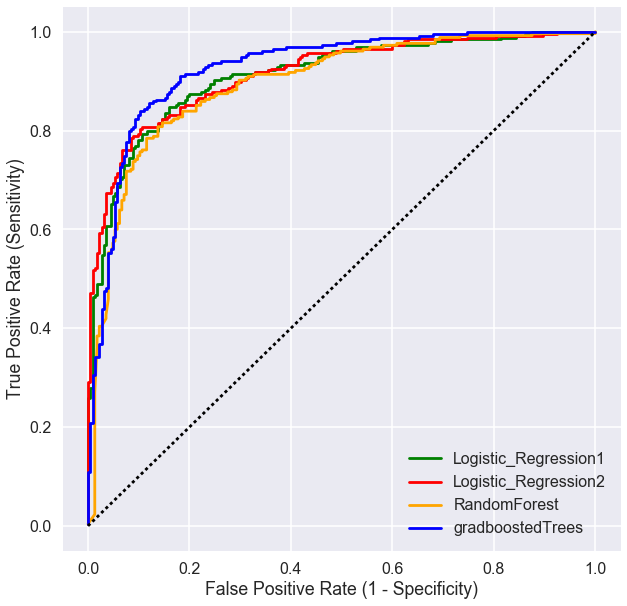

In [45]:
## works for BINARY Labels == 1 vs 0 from True False
from sklearn.metrics import roc_auc_score, roc_curve

# pltcolor = ['orange','g','r']
pltcolor = ['g','r','orange','blue']
cnt=0
for name, model in models.items():
    
    mFit = model.fit(X_train, ytrain)
    y_pred = mFit.predict(X_test)
    yH_pred = mFit.predict(X_testhold)
    
    y_prob = mFit.predict_proba(X_test)[:,1] ##
    yH_prob = mFit.predict_proba(X_testhold)[:,1] ##


    #y_pred = mFit.predict(X_holdout)
    
    print('Model: '+name)
    print('AUC_test:  ', roc_auc_score(ytest,y_pred))
    print('AUC_holdout:  ', roc_auc_score(ytest_hold, yH_pred))
    
#     fpr, tpr, thresholds = roc_curve(ytest,y_prob,pos_label=1)
    fpr, tpr, thresholds = roc_curve(ytest_hold,yH_prob,pos_label=1)
    
    
    plt.figure(1,figsize=[10,10])
    plt.subplot(1,1,1)
    plot_roc_curves(fpr,tpr,pltcolor[cnt])
    plt.legend(list(models.keys()),loc='best')
    print()

    cnt+=1
    if cnt >= len(list(models.items())):
        plt.plot(fpr,fpr, 'k:');
        

#     https://www.kaggle.com/wiki/AreaUnderCurve

In [46]:
name = 'gradboostedTrees'
model = models['gradboostedTrees']

scores = cross_validation.cross_val_score(model, X_train, ytrain, n_jobs=1, cv = 10)
print('Model: '+name)
print("Score: " + str(np.mean(scores)))
print ()

mFit = model.fit(X_train, ytrain)
y_pred = mFit.predict(X_test)

print('Model: '+name)
#print(precision_recall_fscore_support(y_test1, y_pred1, average='binary'))
print(classification_report(ytest, y_pred)) #, target_names=list(y_test.unique())))
print ()

cnf_matrixGBT = metrics.confusion_matrix(ytest, y_pred)

Model: gradboostedTrees
Score: 0.816974035053

Model: gradboostedTrees
             precision    recall  f1-score   support

          0       0.82      0.85      0.83       284
          1       0.84      0.82      0.83       292

avg / total       0.83      0.83      0.83       576




In [47]:
yH_pred = mFit.predict(X_testhold)
print(classification_report(ytest_hold, yH_pred))

metrics.confusion_matrix(ytest_hold, yH_pred)

             precision    recall  f1-score   support

          0       0.84      0.88      0.86       225
          1       0.89      0.85      0.87       255

avg / total       0.87      0.86      0.86       480



array([[198,  27],
       [ 38, 217]])

In [48]:
cnf_matrixGBT_hold = metrics.confusion_matrix(ytest_hold, yH_pred)

Confusion matrix, without normalization


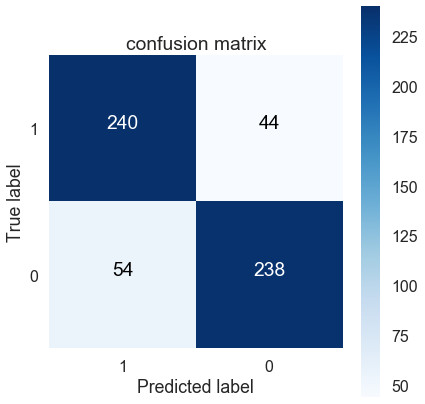

[[ 0.85  0.15]
 [ 0.18  0.82]]
Normalized confusion matrix


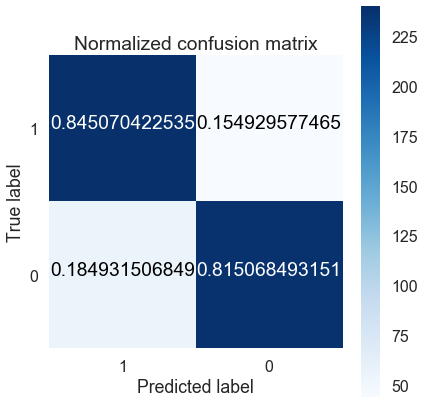

Confusion matrix, without normalization


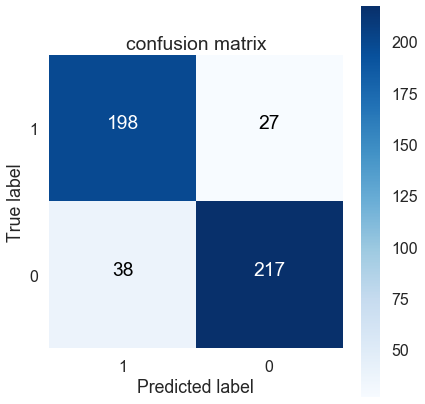

[[ 0.88  0.12]
 [ 0.15  0.85]]
Normalized confusion matrix


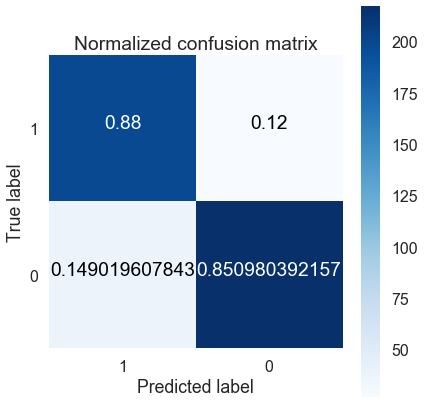

In [49]:
plt.figure(figsize=[6,6])
plot_confusion_matrix(cnf_matrixGBT, classes=ytest.unique(), 
                      title='confusion matrix')
plt.grid(None)
plt.show()

plt.figure(figsize=[6,6])
plot_confusion_matrix(cnf_matrixGBT, classes=ytest.unique(), normalize=True,
                      title='Normalized confusion matrix')
plt.grid(None)
plt.show()


plt.figure(figsize=[6,6])
plot_confusion_matrix(cnf_matrixGBT_hold, classes=ytest_hold.unique(), 
                      title='confusion matrix')
plt.grid(None)
plt.show()

plt.figure(figsize=[6,6])
plot_confusion_matrix(cnf_matrixGBT_hold, classes=ytest_hold.unique(), normalize=True,
                      title='Normalized confusion matrix')
plt.grid(None)
plt.show()

In [50]:
name = 'Logistic_Regression1'
model = models['Logistic_Regression1']

scores = cross_validation.cross_val_score(model, X_train, ytrain, n_jobs=1, cv = 10)
print('Model: '+name)
print("Score: " + str(np.mean(scores)))
print ()

LmFit = model.fit(X_train, ytrain)
Ly_pred = LmFit.predict(X_test)

print('Model: '+name)
#print(precision_recall_fscore_support(y_test1, y_pred1, average='binary'))
print(classification_report(ytest, Ly_pred)) #, target_names=list(y_test.unique())))
print ()

cnf_matrixLR = metrics.confusion_matrix(ytest, Ly_pred)


LyH_pred = LmFit.predict(X_testhold)
print(classification_report(ytest_hold, LyH_pred))

metrics.confusion_matrix(ytest_hold, LyH_pred)

cnf_matrixLR_hold = metrics.confusion_matrix(ytest_hold, LyH_pred)

Model: Logistic_Regression1
Score: 0.805796751536

Model: Logistic_Regression1
             precision    recall  f1-score   support

          0       0.81      0.80      0.80       284
          1       0.81      0.82      0.81       292

avg / total       0.81      0.81      0.81       576


             precision    recall  f1-score   support

          0       0.82      0.84      0.83       225
          1       0.86      0.84      0.85       255

avg / total       0.84      0.84      0.84       480



Confusion matrix, without normalization


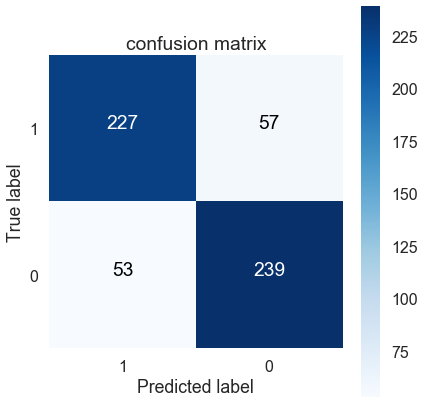

[[ 0.8   0.2 ]
 [ 0.18  0.82]]
Normalized confusion matrix


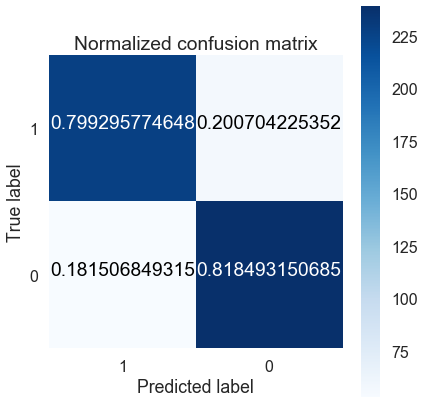

Confusion matrix, without normalization


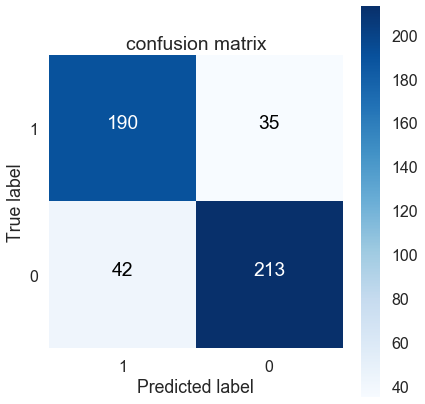

[[ 0.84  0.16]
 [ 0.16  0.84]]
Normalized confusion matrix


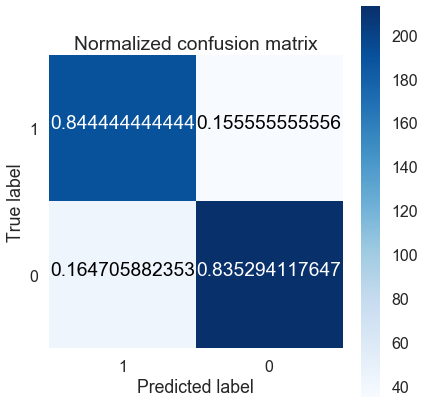

In [95]:
plt.figure(figsize=[6,6])
plot_confusion_matrix(cnf_matrixLR, classes=ytest.unique(), 
                      title='confusion matrix')
plt.grid(None)
plt.show()

plt.figure(figsize=[6,6])
plot_confusion_matrix(cnf_matrixLR, classes=ytest.unique(), normalize=True,
                      title='Normalized confusion matrix')
plt.grid(None)
plt.show()


plt.figure(figsize=[6,6])
plot_confusion_matrix(cnf_matrixLR_hold, classes=ytest_hold.unique(), 
                      title='confusion matrix')
plt.grid(None)
plt.show()

plt.figure(figsize=[6,6])
plot_confusion_matrix(cnf_matrixLR_hold, classes=ytest_hold.unique(), normalize=True,
                      title='Normalized confusion matrix')
plt.grid(None)
plt.show()

### New Model

Plot Feature Impt Refs   
- http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
- http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
    


In [51]:
# mFit.feature_importances_
FeaturesDF = pd.DataFrame(sorted(zip(X_testhold.columns, mFit.feature_importances_)) )
FeaturesDF.columns = ['FeatureCode','relativeImp']
FeaturesDF['FeatureImp'] = 100.0 * (FeaturesDF.relativeImp / FeaturesDF.relativeImp.max())

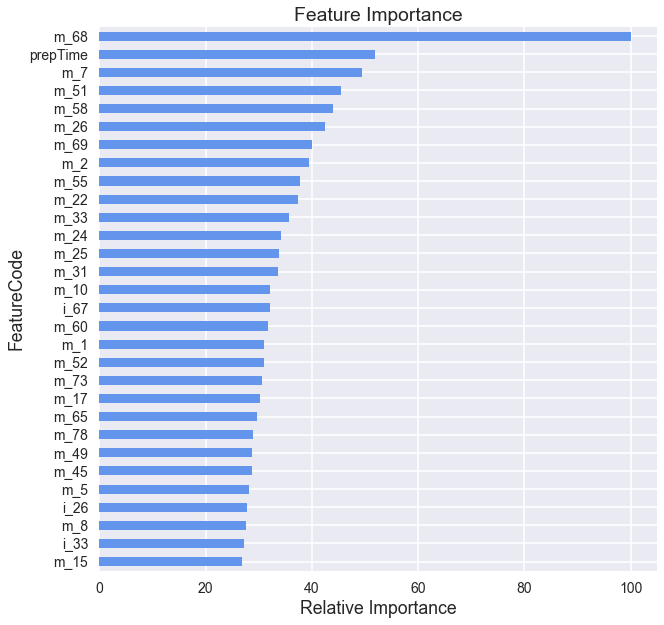

In [52]:
FeaturesDF2 = FeaturesDF.sort_values(by=['FeatureImp'],ascending=False)
FeaturesDF2 = FeaturesDF2.reset_index()#.FeatureImp.sort_values(ascending=False).head(20).plot.barh()
FeaturesDF2.index = FeaturesDF2.FeatureCode

FeaturesDF2.FeatureImp.head(30).sort_values(ascending=True).plot.barh(figsize=(10,10),
                                                                      title='Feature Importance', 
                                                                      color='cornflowerblue',
                                                                      fontsize=14);
plt.xlabel('Relative Importance');

In [ ]:
# MTopic 68: #cake baking
# cake tin bake cool sugar butter beat mix oven flour egg top ice togeth bowl line mixtur parchment smooth skewer

# PrepTime

# MTopic 7: #Risotto | beef wellington?
# squash beef minc brown parsnip sauc spoon fri risotto break parmesan tip season defrost onion mash worcestershir hot well littl

# MTopic 51: #Meringue 
# whisk white egg fold meringu bowl mixtur stiff sugar peak yolk larg use spoon thick electr beat continu form gentl

# MTopic 58: # roast Chicken
# chicken breast piec thigh side garlic juic rest tarragon lift coat remov bash plate rub season use pin flatten cover

# MTopic 26: # casserol dishes
# dish casserol oven cover brown lid meat simmer remov season onion larg bring sauc stock pour tender flameproof return fri

# MTopic 69: # stew
# chees leek season melt cauliflow sauc mustard soft top scatter mix cheddar sprinkl grate salad thyme remain onion golden chive

# MTopic 2: # ?Instruction cautionary words
# care veri take time ani turn keep back start one use spoon tip don't let leav give much put see

# MTopic 55: # baking dishes
# dish bake oven top ovenproof golden layer butter scatter mix cover shallow mixtur sprinkl pour remain larg spoon togeth foil

# MTopic 22: #steak/ham/grill
# steak marinad side marin leav rest sauc mix turn cover ham make least meat ingredi fridg glaze griddl hot rub


# ITopic 67: # chocolate
# sugar flour powder egg butter self-rais bake caster milk cocoa extract plain vanilla dark-chocol ice

# ITopic 26: # garnish related
# shallot green onion butter spring serv steam scallop zest flour fraich food fondant flower flatleaf

# ITopic 33: # cream/chocolate/booze
# cream doubl butter dark-chocol milk sugar whip serv egg coffe liqueur liquid glucos squar disaronno

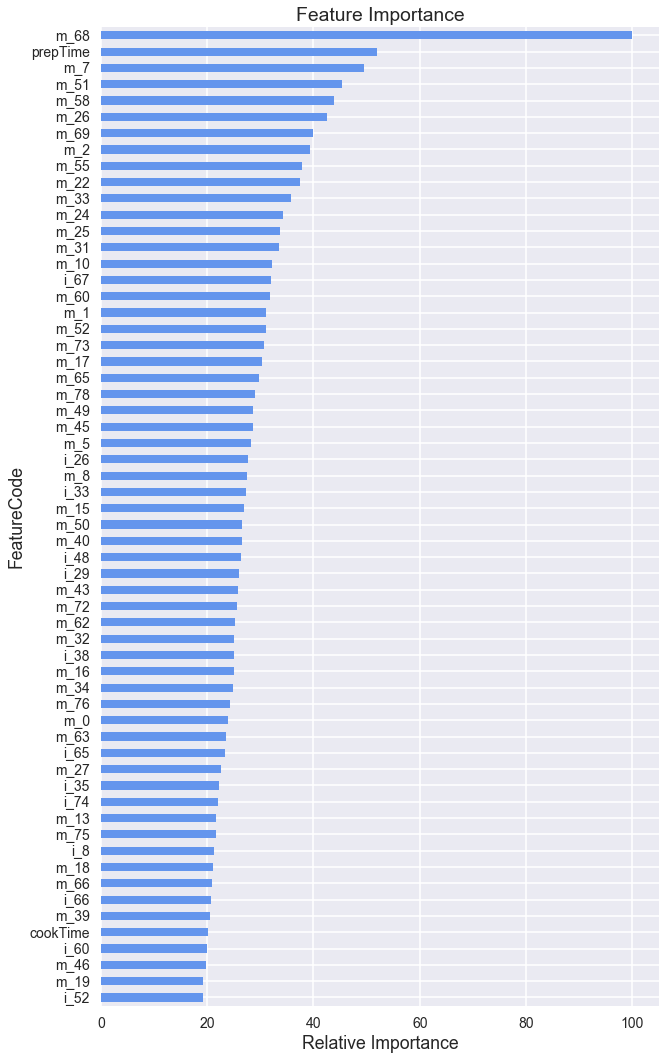

In [54]:
FeaturesDF2.FeatureImp.head(60).sort_values(ascending=True).plot.barh(figsize=(10,18),
                                                                      title='Feature Importance', 
                                                                      color='cornflowerblue',
                                                                      fontsize=14);
plt.xlabel('Relative Importance');

In [ ]:
# sorted_features = pd.DataFrame(sorted(zip(X_testhold.columns, LmFit.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True))
# sorted_features

In [55]:
# mFit.feature_importances_
# LR_FeaturesDF = pd.DataFrame(sorted(zip(X_testhold.columns, LmFit.coef_[0])) )
LR_FeaturesDF = pd.DataFrame(sorted(zip(X_testhold.columns, LmFit.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True))

LR_FeaturesDF.columns = ['FeatureCode','relativeImp']
LR_FeaturesDF['FeatureImp'] = 100.0 * (LR_FeaturesDF.relativeImp / LR_FeaturesDF.relativeImp.abs().max())

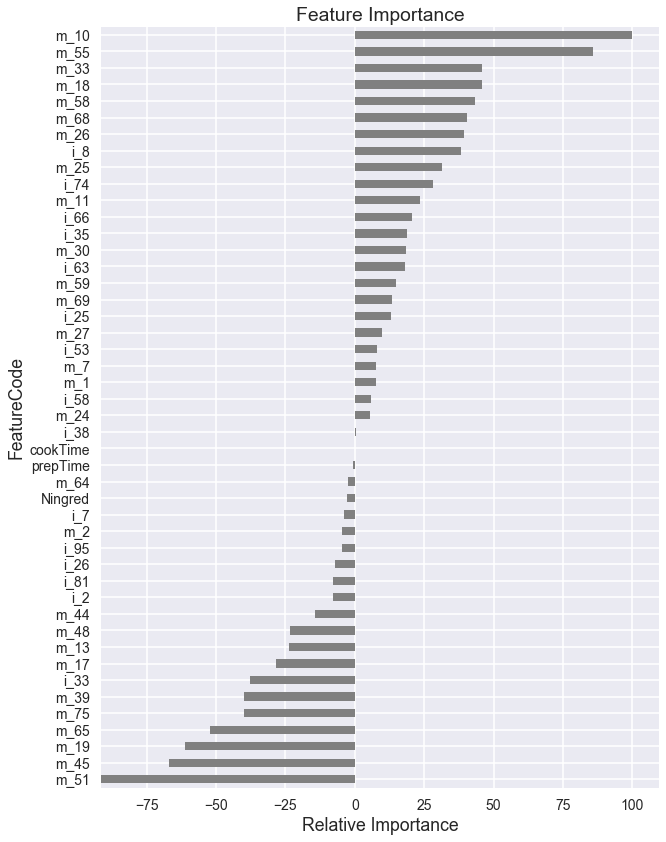

In [56]:
LR_FeaturesDF2 = LR_FeaturesDF.sort_values(by=['FeatureImp'],ascending=False)
LR_FeaturesDF2 = LR_FeaturesDF2.reset_index()#.FeatureImp.sort_values(ascending=False).head(20).plot.barh()
LR_FeaturesDF2.index = LR_FeaturesDF2.FeatureCode

# LR_FeaturesDF2.FeatureImp.sort_values(ascending=True).plot.barh(figsize=(10,20),title='Feature Importance', color='g');
LR_FeaturesDF2.FeatureImp[LR_FeaturesDF2.FeatureImp!=0].sort_values(ascending=True).plot.barh(figsize=(10,14),
                                                                                              title='Feature Importance', 
                                                                                              color=['gray'], 
                                                                                              fontsize=14);
plt.xlabel('Relative Importance');
# plt.rcParams.update({'font.size': 10})

In [ ]:
# MTopic 10: #soup/stew
# simmer stock bring onion boil gentl larg season saucepan soup veget cover soften lentil pour garlic tender ladl fri bowl

# MTopic 55: #baked oven dish
# dish bake oven top ovenproof golden layer butter scatter mix cover shallow mixtur sprinkl pour remain larg spoon togeth foil

# MTopic 33: #pasta
# pasta pack instruct follow drain water meanwhil parmesan sauc accord boil tip toss garlic larg reserv season well spaghetti togeth

# MTopic 18: #curry
# coriand onion curri past chilli fri ginger water coconut simmer spice leav rice garlic tomato yogurt seed powder larg cumin

# MTopic 26: #casserole dishes
# dish casserol oven cover brown lid meat simmer remov season onion larg bring sauc stock pour tender flameproof return fri

# ITopic 8: #baking 
# brown sugar soft soda light bicarbon flour butter egg self-rais cinnamon treacl muscovado buttermilk sunflow

# ITopic 74: #chicken-related
# breast chicken boneless skinless oliv blue onion sunflow strip zest flour free-rang fraich food fondant

# ITopic 66: #fingerfood / stew
# carrot celeri pure tomato stick onion oliv garlic stock haricot sugar flesh flower flour food

# ITopic 35: #basil/italian -- salad/finger-food?
# basil leav oliv tomato garlic mozzarella passata ball parmesan penn carton pesto all-butt block egg





# MTopic 51: #Meringue
# whisk white egg fold meringu bowl mixtur stiff sugar peak yolk larg use spoon thick electr beat continu form gentl

# MTopic 45: #custard
# sugar cream pour custard boil vanilla put cool bowl ice milk caramel leav gentl bring whisk saucepan spoon water mixtur

# MTopic 19: #Roast meat/duck
# skin duck roast fat leg oven rest breast foil juic remov bird tin caviti put cover ani place time insid

# MTopic 65: #deepfrying
# paper kitchen drain pat salt chip crisp fri spoon turn slot piec remov larg set plate lift hot asid corn

# MTopic 75: #parcel-type method
# roll end wrap sausag slice lay tight foil one side parcel make piec long place around fold leav cut middl

# MTopic 39: #pastry/baking/case
# pastri bake tart oven tin line remov case fill bean chill egg roll cool light flour golden parchment surfac base

# ITopic 33: #chocolate/
# cream doubl butter dark-chocol milk sugar whip serv egg coffe liqueur liquid glucos squar disaronno

In [ ]:
LR_FeaturesDF2.FeatureImp[LR_FeaturesDF2.FeatureImp!=0]

In [ ]:
LmFit.predict_proba(X_test)

In [ ]:
X_testhold.columns

### Test Model to try predict prepDiff of recipes not used in modelling :

In [ ]:
Ing.prepDifficulty.value_counts()

In [85]:
# df_easy2 = Ing.ix[IDXeasy.index.tolist()][1201:]#

df_easy2 = Ing.ix[IDXeasy.index.tolist()][-386:]#
df_effort2 = Ing.ix[IDXmoreEffort.index.tolist()][1201:]#
df_challenge2 = Ing.ix[IDXchallenge.index.tolist()][:]

# df = pd.concat([df_easy2,df_effort2],axis=0)
df = pd.concat([df_easy2,df_effort2,df_challenge2],axis=0)

# df = df_easy2
# df = df_effort2
# df = df_challenge2
print(df.shape) 

TestXYLabel = df.prepDifficulty.to_frame()#.reset_index()
# TestXYLabel.index.tolist()

(772, 7)


In [86]:
df_easy2.shape, df_effort2.shape, df_challenge2.shape, df.shape

((386, 7), (163, 7), (223, 7), (772, 7))

In [87]:
XYtestIng = Ing.ix[TestXYLabel.index.tolist()].ix[:,1:]

In [88]:
X2 = XYtestIng.ix[:,:5]
Y2 = XYtestIng.ix[:,5].to_frame()

print(len(Y2.prepDifficulty.unique().tolist()) )

Y2['prepDiffnum'] = Y2.prepDifficulty
Y2['prepDiffnum'] = Y2.prepDiffnum.apply(lambda x: int(x=='Easy'))

3


In [89]:
Y2.prepDiffnum.unique().tolist(), Y2.prepDifficulty.unique().tolist()

([1, 0], ['Easy', 'More effort', 'A challenge'])

In [90]:
## Convert Raw string items to vec
## Apply LDA modelling... pick some components rather than all... 

iX2_vec = itf_vectorizer.transform(X2.ingred)
print(iX2_vec.shape)
# iX_train0 = pd.DataFrame(ilda_tfidf.transform(iX_train_vec))
iX2_0 = pd.DataFrame(ilda_tf.transform(iX2_vec))
iX2_0.columns = ['i_'+str(i) for i in range(iX2_0.shape[1])]
iX2_00 = iX2_0#[iidx]
iX2 = pd.concat([X2.reset_index()[['Ningred','prepTime','cookTime']],iX2_00],axis=1)
# iX_train = pd.concat([xtrain.reset_index()[['Ningred','prepTime','cookTime']],iX_train_vec],axis=1)
print(iX2.shape)


mX2_vec = mtf_vectorizer.transform(X2.method)
print(mX2_vec.shape)
# mX_train0 = pd.DataFrame(mlda_tfidf.transform(mX_train_vec))
mX2_0 = pd.DataFrame(mlda_tf.transform(mX2_vec))
mX2_0.columns = ['m_'+str(m) for m in range(mX2_0.shape[1])]
mX2 = mX2_0#[[0,1,2,79]]
print(mX2.shape)

# X_train_vec = hstack([iX_train_vec,mX_train_vec]).todense()#.toarray()
# print(X_train_vec.shape)
X2test = pd.concat([iX2,mX2],axis=1)
print(X2test.shape)

(772, 678)
(772, 103)


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s finished


(772, 1531)
(772, 80)
(772, 183)


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.6s finished


In [ ]:
# LmFit.predict_proba(X2test)

In [63]:
# test only all unused df_effort2
LY2_pred = LmFit.predict(X2test)
print(classification_report(Y2.prepDiffnum, LY2_pred))

metrics.confusion_matrix(Y2.prepDiffnum, LY2_pred)

             precision    recall  f1-score   support

          0       1.00      0.89      0.94       163
          1       0.00      0.00      0.00         0

avg / total       1.00      0.89      0.94       163



/Users/hrm/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array([[145,  18],
       [  0,   0]])

In [70]:
# test only all unused df_challenge2
LY2_pred = LmFit.predict(X2test)
print(classification_report(Y2.prepDiffnum, LY2_pred))

metrics.confusion_matrix(Y2.prepDiffnum, LY2_pred)

             precision    recall  f1-score   support

          0       1.00      0.92      0.96       223
          1       0.00      0.00      0.00         0

avg / total       1.00      0.92      0.96       223



/Users/hrm/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array([[205,  18],
       [  0,   0]])

In [77]:
# test only all unused df_easy2
LY2_pred = LmFit.predict(X2test)
print(classification_report(Y2.prepDiffnum, LY2_pred))

metrics.confusion_matrix(Y2.prepDiffnum, LY2_pred)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.73      0.84      7263

avg / total       1.00      0.73      0.84      7263



/Users/hrm/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


array([[   0,    0],
       [1966, 5297]])

In [84]:
## all unused labels -- more easy than effort+challenge
LY2_pred = LmFit.predict(X2test)
print(classification_report(Y2.prepDiffnum, LY2_pred))

metrics.confusion_matrix(Y2.prepDiffnum, LY2_pred)

             precision    recall  f1-score   support

          0       0.15      0.91      0.26       386
          1       0.99      0.73      0.84      7263

avg / total       0.95      0.74      0.81      7649



array([[ 350,   36],
       [1966, 5297]])

In [94]:
## all unused labels -- equal easy & effort+challenge
LY2_pred = LmFit.predict(X2test)
print(classification_report(Y2.prepDiffnum, LY2_pred))

metrics.confusion_matrix(Y2.prepDiffnum, LY2_pred)

             precision    recall  f1-score   support

          0       0.76      0.91      0.83       386
          1       0.88      0.71      0.79       386

avg / total       0.82      0.81      0.81       772



array([[350,  36],
       [112, 274]])